In [64]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(font_scale=1.5, style="whitegrid")
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('data.csv', parse_dates=['Date'])

In [66]:
df.head(2)

Name  Fill_rate  Normal_capacity  Reserve       Date
0  Oued El Makhazine       72.4            672.9    487.1 2018-10-26
1  Oued El Makhazine       46.5            672.9    312.6 2017-10-26

In [67]:
df.Fill_rate = df.Fill_rate.replace({'None':np.nan})

In [68]:
df.Reserve = df.Reserve.astype(float)
df.Reserve.fillna(df.Reserve.mean(), inplace=True)

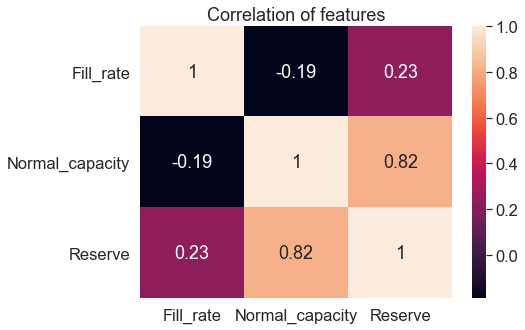

In [69]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, annot=True, ax=ax)
ax.set_title('Correlation of features')
plt.show()

In [70]:
date_feats = ['year']

In [71]:
df.head(3)

Name  Fill_rate  Normal_capacity  Reserve       Date
0  Oued El Makhazine       72.4            672.9    487.1 2018-10-26
1  Oued El Makhazine       46.5            672.9    312.6 2017-10-26
2          Hassan II       63.2            392.3    247.9 2018-10-26

In [72]:
for feat in date_feats:
    df[feat] = getattr(df['Date'].dt, feat)

In [73]:
df.head(3)

Name  Fill_rate  Normal_capacity  Reserve       Date  year
0  Oued El Makhazine       72.4            672.9    487.1 2018-10-26  2018
1  Oued El Makhazine       46.5            672.9    312.6 2017-10-26  2017
2          Hassan II       63.2            392.3    247.9 2018-10-26  2018

In [74]:
df[feat]

0        2018
1        2017
2        2018
3        2017
4        2018
         ... 
16075    2020
16076    2021
16077    2020
16078    2021
16079    2020
Name: year, Length: 16080, dtype: int64

In [75]:
df['day_name'] = df.Date.dt.day_name()
df['month_name'] = df.Date.dt.month_name()

In [76]:
def get_data(df, name='all', date_sort=True, day_filter='all', month_filter='all', year_filter='all'):
    if name == 'all':
        data = df.copy()
    else:
        data = df[df['Name'].isin(name) ]
    if date_sort:
        data = data.sort_values(by='Date')
    if day_filter != 'all':
        data = data[data['day_name'].isin(day_filter) ]
    if month_filter != 'all':
        data = data[data['month_name'].isin(month_filter) ]
    if year_filter != 'all':
        data = data[data['year'].isin(year_filter) ]
    data.drop_duplicates(inplace=True)
        
    return data.reset_index(drop=True)

In [77]:
data_viz = get_data(df, name=['Idriss 1er', 'Oued El Makhazine'], day_filter='all',
                   month_filter=['January', 'February', 'March'], year_filter=[2021])

In [78]:
data_viz

Name  Fill_rate  Normal_capacity  Reserve       Date  year  \
0    Oued El Makhazine       86.7            672.9    583.1 2021-01-01  2021   
1           Idriss 1er       57.2           1129.6    646.4 2021-01-01  2021   
2    Oued El Makhazine       98.8            672.9    664.5 2021-01-02  2021   
3           Idriss 1er       67.3           1129.6    760.4 2021-01-02  2021   
4    Oued El Makhazine       94.1            672.9    632.9 2021-01-04  2021   
..                 ...        ...              ...      ...        ...   ...   
137         Idriss 1er       78.7           1129.6    889.5 2021-03-28  2021   
138         Idriss 1er       78.9           1129.6    891.0 2021-03-29  2021   
139  Oued El Makhazine       94.4            672.9    635.1 2021-03-29  2021   
140         Idriss 1er       79.1           1129.6    893.5 2021-03-30  2021   
141  Oued El Makhazine       94.3            672.9    634.3 2021-03-30  2021   

     day_name month_name  
0      Friday    January  
1      Friday    January  
2    Saturday    January  
3    Saturday    January  
4      Monday    January  
..        ...        ...  
137    Sunday      March  
138    Monday      March  
139    Monday      March  
140   Tuesday      March  
141   Tuesday      March  

[142 rows x 8 columns]

In [79]:
def visualize_data(data, x='Date', y='Fill_rate', hue='Name'):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.lineplot(data=data, x=x, y=y, hue=hue, ax=ax)
    if x=='Date':
        date_form = DateFormatter("%m-%d")
        ax.xaxis.set_major_formatter(date_form)
    ax.set_title('{} vs {}'.format(x,y))
    plt.show()

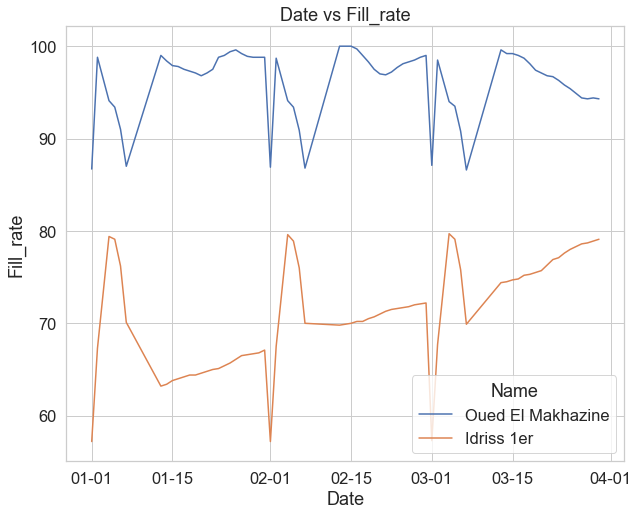

In [80]:
visualize_data(data_viz)

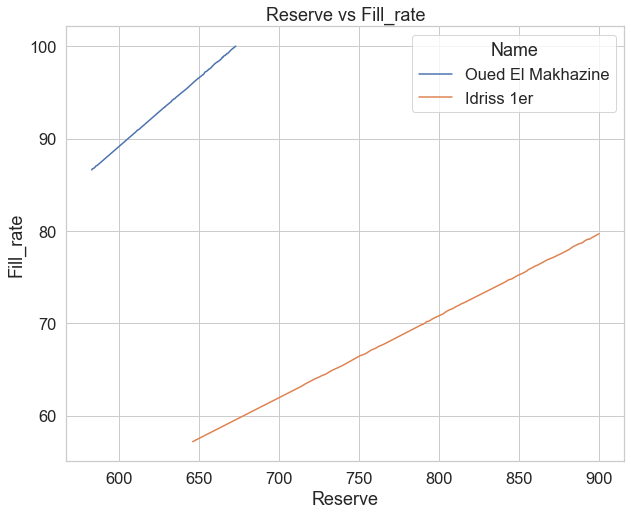

In [81]:
visualize_data(data_viz, x='Reserve')

In [82]:
data_viz1 = get_data(df, name=['Idriss 1er', 'Oued El Makhazine'], day_filter=['Friday','Saturday','Sunday'],
                   month_filter='all', year_filter=[2020])

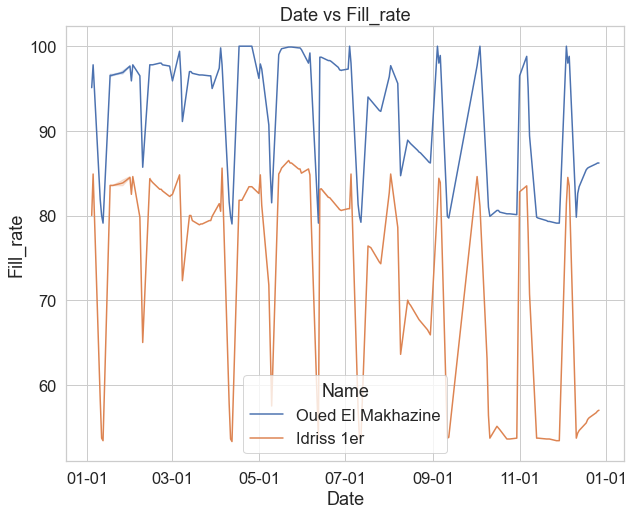

In [83]:
visualize_data(data_viz1)

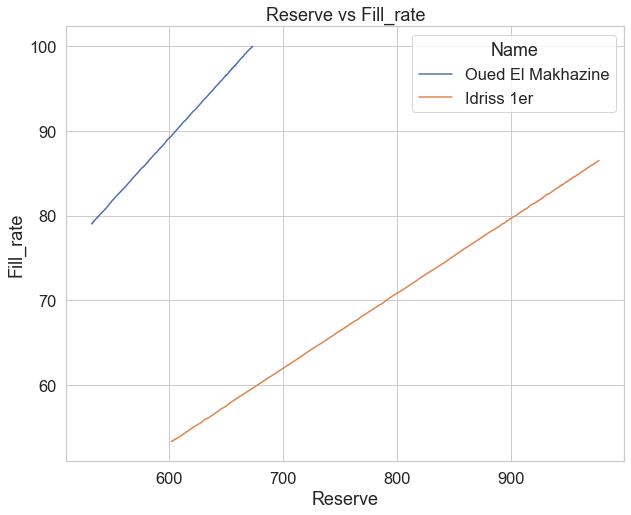

In [84]:
visualize_data(data_viz1, x='Reserve')

In [85]:
df.head(3)

Name  Fill_rate  Normal_capacity  Reserve       Date  year  \
0  Oued El Makhazine       72.4            672.9    487.1 2018-10-26  2018   
1  Oued El Makhazine       46.5            672.9    312.6 2017-10-26  2017   
2          Hassan II       63.2            392.3    247.9 2018-10-26  2018   

   day_name month_name  
0    Friday    October  
1  Thursday    October  
2    Friday    October

In [86]:
df.sort_values(by=['Date'], inplace=True)

In [87]:
data_viz = get_data(df, name=[0,1,2], day_filter='all',
                   month_filter=[0,1,2], year_filter=[2021])

In [88]:
data_viz

Empty DataFrame
Columns: [Name, Fill_rate, Normal_capacity, Reserve, Date, year, day_name, month_name]
Index: []

In [89]:
df_filtered = df[df['Reserve'] <= 1400]

In [90]:
print(df_filtered.shape)

(14473, 8)


In [91]:
print(df.shape)

(16080, 8)


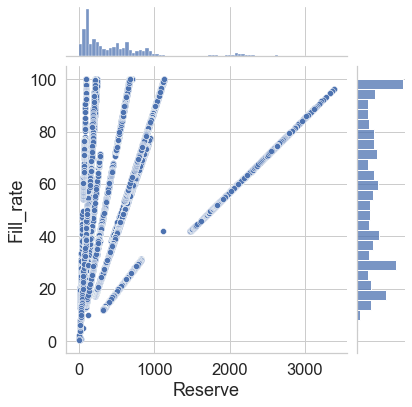

In [92]:
sns.jointplot(x="Reserve",y="Fill_rate",data=df)

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
barrage_encoder = LabelEncoder()
month_encoder = LabelEncoder()
day_encoder = LabelEncoder()

In [95]:
barrage_encoder.fit(df.Name)
month_encoder.fit(df.month_name)
day_encoder.fit(df.day_name)

LabelEncoder()

In [96]:
df['Name'] = barrage_encoder.transform(df['Name'])
df['month_name'] = month_encoder.transform(df['month_name'])
df['day_name'] = day_encoder.transform(df['day_name'])

In [97]:
after_2021 = df[df['Date']>=datetime(2021, 1, 1)]
before_2021 = df[df['Date']<datetime(2021, 1, 1)]

In [98]:
features = ['Name', 'Fill_rate','year','day_name', 'month_name',]
TARGET = ['Reserve']

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [100]:
X = before_2021[features]
y = before_2021[TARGET]

In [101]:
random_state=2021

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [103]:
rfc = RandomForestRegressor(random_state=random_state)

In [104]:
rfc.fit(x_train, y_train)

RandomForestRegressor(random_state=2021)

In [105]:
predictions=rfc.predict(x_test)

In [106]:
predictions

array([658.71      , 536.562     , 387.92386667, ..., 374.947     ,
        94.6       ,  17.291     ])

In [108]:
predictions=predictions.reshape(2866  ,1)

<AxesSubplot:ylabel='Density'>

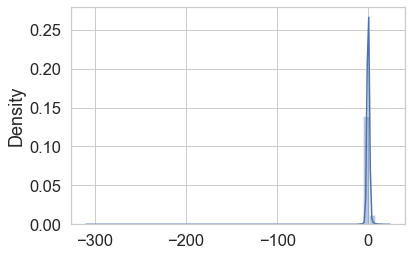

In [109]:
sns.distplot(y_test-predictions)

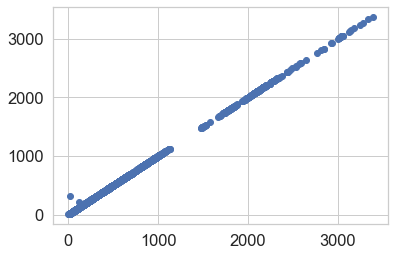

In [110]:
plt.scatter(y_test,predictions)

In [111]:
def EvaluateModel(model, test_features, test_targets):    
    '''
    function to evaluate the performance of a model on the test data
    
    args:
        model: The model to evaluate
        
        test_features: the independent feature values to be evaluated
        
        test_targets: the dependent target values to be evaluated
        
    returns:
        eval_df: A pandas datafame that contains metric results 
    '''
    
    eval_df = pd.DataFrame()
    preds = model.predict(test_features)
    
    eval_df['R2_score'] = pd.Series(r2_score(test_targets, preds), name='r2')
    eval_df['Mean_absolute_error'] = pd.Series(mean_absolute_error(test_targets, preds), name='mae')
    eval_df['Mean_squared_error'] = pd.Series(mean_squared_error(test_targets, preds), name='mse')
    eval_df['Root_mean_squared_error'] = pd.Series(np.sqrt(mean_squared_error(test_targets, preds)), name='rmse')
    
    return eval_df


In [112]:
train_eval_df = EvaluateModel(rfc, x_train, y_train)

In [113]:
train_eval_df

R2_score  Mean_absolute_error  Mean_squared_error  Root_mean_squared_error
0  0.999953             0.248856           16.814779                 4.100583

In [114]:
test_eval_df = EvaluateModel(rfc, x_test, y_test)

In [115]:
test_eval_df

R2_score  Mean_absolute_error  Mean_squared_error  Root_mean_squared_error
0  0.999903             0.585529           37.011573                 6.083714

In [116]:
x_val = after_2021[features]
y_val = after_2021[TARGET]

In [117]:
val_eval_df = EvaluateModel(rfc, x_val, y_val)

In [118]:
val_eval_df


R2_score  Mean_absolute_error  Mean_squared_error  Root_mean_squared_error
0  0.999996             0.750538             2.30285                 1.517514

In [119]:
val_eval_df

R2_score  Mean_absolute_error  Mean_squared_error  Root_mean_squared_error
0  0.999996             0.750538             2.30285                 1.517514

In [120]:
df.head(3)

Name  Fill_rate  Normal_capacity  Reserve       Date  year  day_name  \
133     4       45.6            216.4     98.7 2017-01-11  2017         6   
137     0       36.0            668.2    240.7 2017-01-11  2017         6   
135     3       18.5           1215.5    225.2 2017-01-11  2017         6   

     month_name  
133           4  
137           4  
135           4

In [121]:
rfc.predict([[1,223,2067,4,14]])[0]

839.6414999999996

In [122]:
import pickle

In [123]:
modelname = 'rfc_model.pkl'
pickle.dump(rfc, open(modelname, 'wb'))

In [124]:
barrage_encoder_name = 'barrage_encoder.pkl'
pickle.dump(barrage_encoder, open(barrage_encoder_name, 'wb'))

In [125]:
month_encoder_name = 'month_encoder.pkl'
pickle.dump(month_encoder, open(month_encoder_name, 'wb'))

In [126]:
day_encoder_name = 'day_encoder.pkl'
pickle.dump(day_encoder, open(day_encoder_name, 'wb'))